In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score,confusion_matrix

In [7]:
dataframecredito = pd.read_csv('dataset.csv')

In [8]:
dataframecredito.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [9]:
dataframecredito.columns


Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target'],
      dtype='object')

In [10]:
dataframecredito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [11]:
dataframecredito.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [12]:
print(dataframecredito.isnull().sum())

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64


In [13]:
dataframecredito.isna().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [15]:
dataframecredito.dtypes

ID                   int64
Gender               int64
Own_car              int64
Own_property         int64
Work_phone           int64
Phone                int64
Email                int64
Unemployed           int64
Num_children         int64
Num_family           int64
Account_length       int64
Total_income       float64
Age                float64
Years_employed     float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Occupation_type     object
Target               int64
dtype: object

In [17]:
dataframecredito = dataframecredito.drop(['ID','Num_family','Phone','Email','Unemployed'],axis=1)

In [18]:
dataframecredito.head()

,Gender,Own_car,Own_property,Work_phone,Num_children,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,0,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,0,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [22]:
# Calculate the proportion of males and females
gender_counts = dataframecredito['Gender'].value_counts()
total_individuals = len(dataframecredito)
male_count = gender_counts[1]
female_count = gender_counts[0]
male_proportion = male_count / total_individuals
female_proportion = female_count / total_individuals

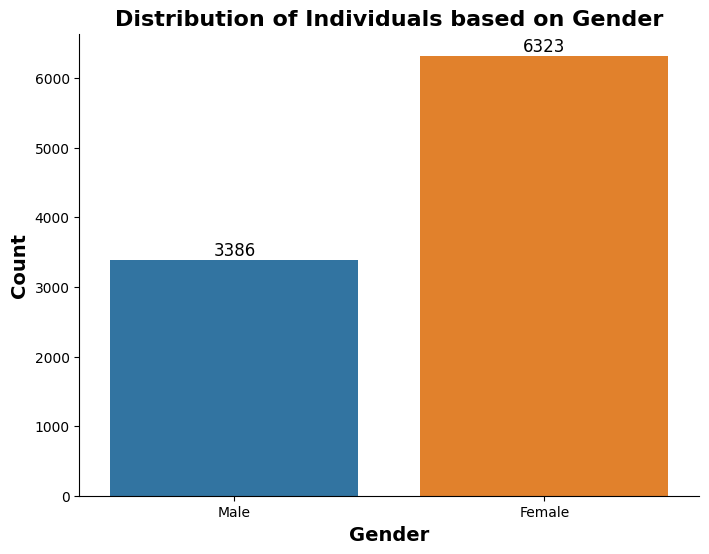

In [23]:
colors = ['#1f77b4', '#ff7f0e']
plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=[male_count, female_count], palette=colors)
for index, value in enumerate([male_count, female_count]):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=12)
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Individuals based on Gender', fontsize=16, fontweight='bold')
sns.despine()
plt.show()

In [24]:
print(f"Proportion of males: {male_proportion:.2f}")
print(f"Proportion of females: {female_proportion:.2f}")

# Determine if there is gender imbalance
if male_proportion != female_proportion:
    gender_imbalance = "Yes"
else:
    gender_imbalance = "No"

Proportion of males: 0.35
Proportion of females: 0.65


In [25]:
print(f"Is there gender imbalance in the data? {gender_imbalance}")


Is there gender imbalance in the data? Yes


In [27]:
# Calculate the percentage of individuals who own a car and who do not own a car
car_counts = dataframecredito['Own_car'].value_counts()
total_individuals = len(dataframecredito)
own_car_count = car_counts[1]
no_car_count = car_counts[0]
own_car_percentage = (own_car_count / total_individuals) * 100
no_car_percentage = (no_car_count / total_individuals) * 100

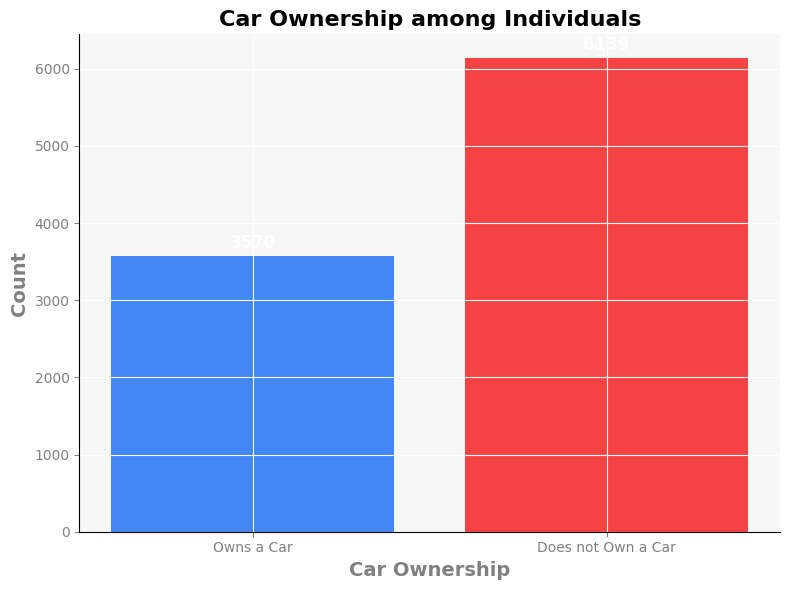

In [28]:
#visualize the number of individuals who own a car and who do not own a car
colors = ['#4287f5', '#f54242']
plt.figure(figsize=(8, 6))
bars = plt.bar(['Owns a Car', 'Does not Own a Car'], [own_car_count, no_car_count], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='white')
plt.gca().set_facecolor('#f7f7f7')
plt.gca().grid(color='white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')
plt.title('Car Ownership among Individuals', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Car Ownership', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='gray')
plt.tight_layout()
plt.show()

In [29]:
print(f"Percentage of individuals who own a car: {own_car_percentage:.2f}%")
print(f"Percentage of individuals who do not own a car: {no_car_percentage:.2f}%")

Percentage of individuals who own a car: 36.77%
Percentage of individuals who do not own a car: 63.23%


In [31]:
# Analyze how car ownership relates to credit card eligibility
car_ownership_eligible = dataframecredito[dataframecredito['Target'] == 1]['Own_car'].value_counts()
car_ownership_not_eligible = dataframecredito[dataframecredito['Target'] == 0]['Own_car'].value_counts()

print("Car Ownership and Credit Card Eligibility:")
print(f"Eligible for a Credit Card:\n{car_ownership_eligible}")
print(f"\nNot Eligible for a Credit Card:\n{car_ownership_not_eligible}")

Car Ownership and Credit Card Eligibility:
Eligible for a Credit Card:
Own_car
0    822
1    461
Name: count, dtype: int64

Not Eligible for a Credit Card:
Own_car
0    5317
1    3109
Name: count, dtype: int64


In [33]:
#the proportion of individuals who own a property and who do not own a property
property_counts = dataframecredito['Own_property'].value_counts()
total_individuals = len(dataframecredito)
own_property_count = property_counts[1]
no_property_count = property_counts[0]
own_property_percentage = (own_property_count / total_individuals) * 100
no_property_percentage = (no_property_count / total_individuals) * 100

In [34]:
print(f"Percentage of individuals who own a property: {own_property_percentage:.2f}%")
print(f"Percentage of individuals who do not own a property: {no_property_percentage:.2f}%")

Percentage of individuals who own a property: 67.15%
Percentage of individuals who do not own a property: 32.85%


In [36]:
#the relationship between property ownership and credit card eligibility
property_ownership_eligible = dataframecredito[dataframecredito['Target'] == 1]['Own_property'].value_counts()
property_ownership_not_eligible = dataframecredito[dataframecredito['Target'] == 0]['Own_property'].value_counts()

print("Property Ownership and Credit Card Eligibility:")
print(f"Eligible for a Credit Card:\n{property_ownership_eligible}")
print(f"Not Eligible for a Credit Card:\n{property_ownership_not_eligible}")

Property Ownership and Credit Card Eligibility:
Eligible for a Credit Card:
Own_property
1    818
0    465
Name: count, dtype: int64
Not Eligible for a Credit Card:
Own_property
1    5702
0    2724
Name: count, dtype: int64


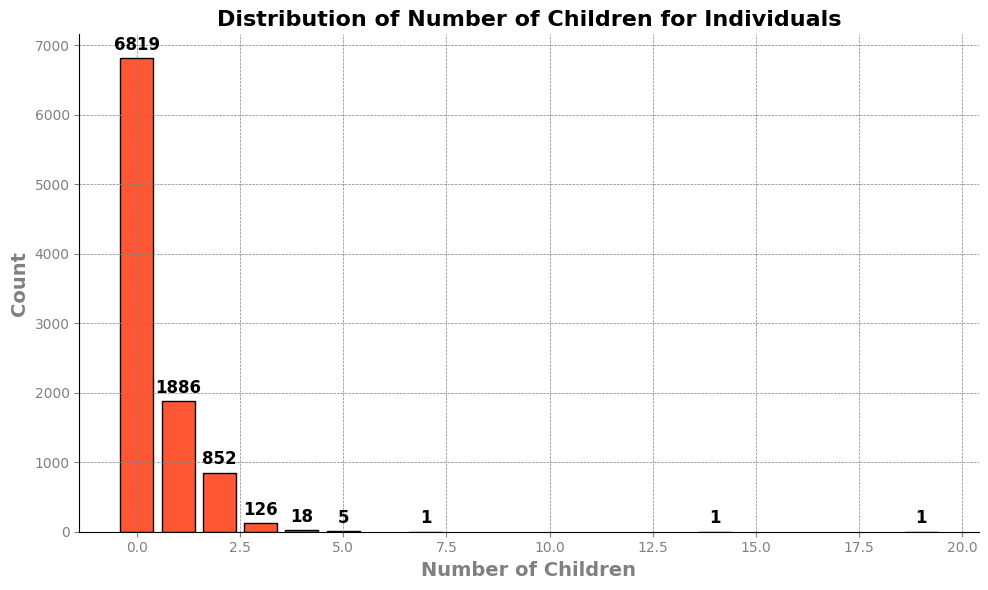

In [38]:
#the distribution of the number of children for individuals
color = '#FF5733'
# Calculate the counts for each unique number of children
num_children_counts = dataframecredito['Num_children'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(num_children_counts.index, num_children_counts.values, color=color, edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.grid(color='gray', linestyle='dashed', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')
plt.title('Distribution of Number of Children for Individuals', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Number of Children', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='gray')
plt.tight_layout()
plt.show()

In [40]:
# the most common number of children among individuals
most_common_num_children = dataframecredito['Num_children'].mode().iloc[0]

#the relationship between the number of children and credit card eligibility
num_children_eligible = dataframecredito[dataframecredito['Target'] == 1]['Num_children'].value_counts()
num_children_not_eligible = dataframecredito[dataframecredito['Target'] == 0]['Num_children'].value_counts()

print(f"The most common number of children among individuals is: {most_common_num_children}")
print("\nNumber of Children and Credit Card Eligibility:")
print(f"Eligible for a Credit Card:\n{num_children_eligible}")
print(f"Not Eligible for a Credit Card:\n{num_children_not_eligible}")

The most common number of children among individuals is: 0

Number of Children and Credit Card Eligibility:
Eligible for a Credit Card:
Num_children
0    878
1    259
2    130
3     14
4      1
7      1
Name: count, dtype: int64
Not Eligible for a Credit Card:
Num_children
0     5941
1     1627
2      722
3      112
4       17
5        5
14       1
19       1
Name: count, dtype: int64


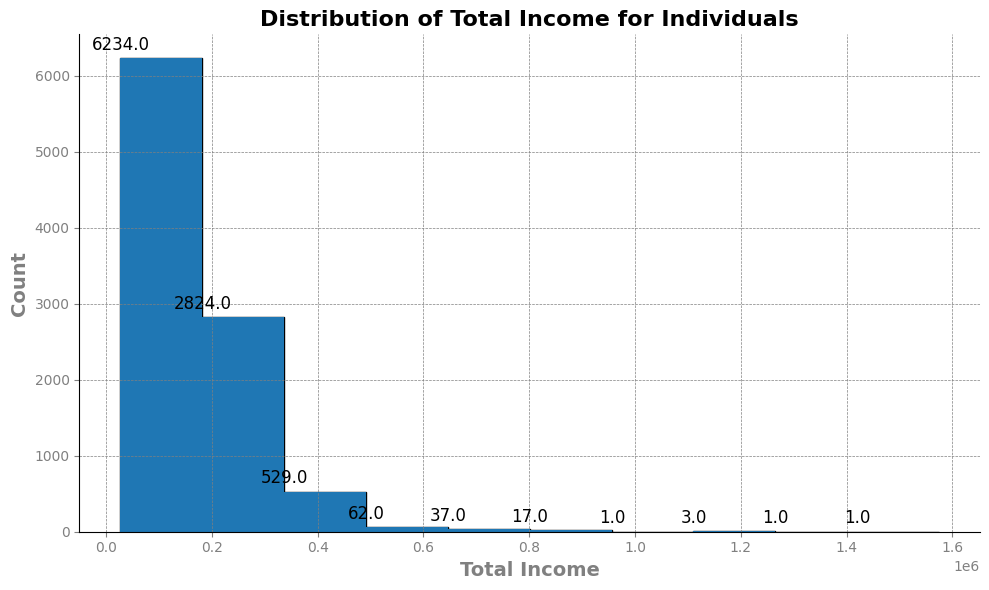

In [43]:
# the distribution of total income for individuals
color = '#4CAF50'
plt.figure(figsize=(10, 6))
plt.hist(dataframecredito['Total_income'], bins=10, color=color, edgecolor='black')
plt.grid(color='gray', linestyle='dashed', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')
plt.title('Distribution of Total Income for Individuals', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Total Income', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='gray')
for idx, count in enumerate(plt.hist(dataframecredito['Total_income'], bins=10)[0]):
    if count > 0:
        plt.annotate(f'{count}', xy=(plt.hist(dataframecredito['Total_income'], bins=10)[1][idx] + 500, count),
                     xytext=(0, 3), textcoords="offset points",
                     ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

In [44]:
# Step 2: Analyze the income distribution among the individuals in the dataset
income_mean = dataframecredito['Total_income'].mean()
income_median = dataframecredito['Total_income'].median()
income_min = dataframecredito['Total_income'].min()
income_max = dataframecredito['Total_income'].max()

print(f"Income Distribution:")
print(f"Mean Income: {income_mean:.2f}")
print(f"Median Income: {income_median:.2f}")
print(f"Minimum Income: {income_min:.2f}")
print(f"Maximum Income: {income_max:.2f}")

Income Distribution:
Mean Income: 181228.19
Median Income: 157500.00
Minimum Income: 27000.00
Maximum Income: 1575000.00


In [45]:
# Step 3: Analyze how income level impacts credit card eligibility
income_eligible = dataframecredito[dataframecredito['Target'] == 1]['Total_income']
income_not_eligible = dataframecredito[dataframecredito['Target'] == 0]['Total_income']

print("\nIncome and Credit Card Eligibility:")
print(f"Eligible for a Credit Card:\n{income_eligible}")
print(f"Not Eligible for a Credit Card:\n{income_not_eligible}")


Income and Credit Card Eligibility:
Eligible for a Credit Card:
0       427500.0
6       130500.0
7       157500.0
14      360000.0
19      157500.0
          ...   
9704    180000.0
9705    112500.0
9706     90000.0
9707    157500.0
9708    112500.0
Name: Total_income, Length: 1283, dtype: float64
Not Eligible for a Credit Card:
1       112500.0
2       270000.0
3       283500.0
4       270000.0
5       135000.0
          ...   
9586     67500.0
9587    112500.0
9588    135000.0
9590    180000.0
9591     90000.0
Name: Total_income, Length: 8426, dtype: float64


In [46]:
#the different occupation types represented in the dataset
occupation_types = dataframecredito['Occupation_type'].unique()

#individuals based on their occupation type
occupation_counts = dataframecredito['Occupation_type'].value_counts()

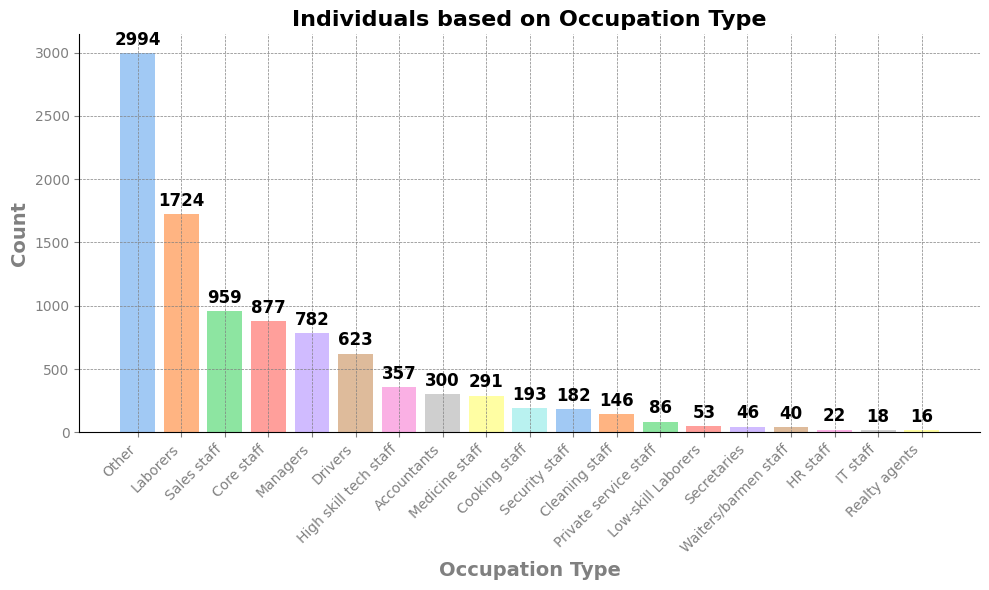

In [47]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(10, 6))
bars = plt.bar(occupation_counts.index, occupation_counts.values, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.grid(color='gray', linestyle='dashed', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')
plt.title('Individuals based on Occupation Type', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Occupation Type', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='gray')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [49]:
#Analyze if there is any influence of occupation type on credit card eligibility
occupation_eligible = dataframecredito[dataframecredito['Target'] == 1]['Occupation_type'].value_counts()
occupation_not_eligible = dataframecredito[dataframecredito['Target'] == 0]['Occupation_type'].value_counts()

print("Occupation Type and Credit Card Eligibility:")
print(f"Eligible for a Credit Card:\n{occupation_eligible}")

Occupation Type and Credit Card Eligibility:
Eligible for a Credit Card:
Occupation_type
Other                    370
Laborers                 225
Core staff               128
Managers                 111
Sales staff              110
Drivers                   89
High skill tech staff     50
Medicine staff            45
Accountants               39
Security staff            30
Cooking staff             28
Cleaning staff            20
Low-skill Laborers        11
Private service staff     10
Secretaries                5
Waiters/barmen staff       5
HR staff                   3
Realty agents              2
IT staff                   2
Name: count, dtype: int64


In [50]:
print(f"Not Eligible for a Credit Card:\n{occupation_not_eligible}")


Not Eligible for a Credit Card:
Occupation_type
Other                    2624
Laborers                 1499
Sales staff               849
Core staff                749
Managers                  671
Drivers                   534
High skill tech staff     307
Accountants               261
Medicine staff            246
Cooking staff             165
Security staff            152
Cleaning staff            126
Private service staff      76
Low-skill Laborers         42
Secretaries                41
Waiters/barmen staff       35
HR staff                   19
IT staff                   16
Realty agents              14
Name: count, dtype: int64


In [52]:
#Count the number of individuals who are eligible and not eligible for a credit card
target_counts = dataframecredito['Target'].value_counts()
eligible_count = target_counts[1]
not_eligible_count = target_counts[0]
total_individuals = len(dataframecredito)

In [53]:
# the distribution of individuals based on credit card eligibility
labels = ['Eligible for Credit Card', 'Not Eligible for Credit Card']
counts = [eligible_count, not_eligible_count]

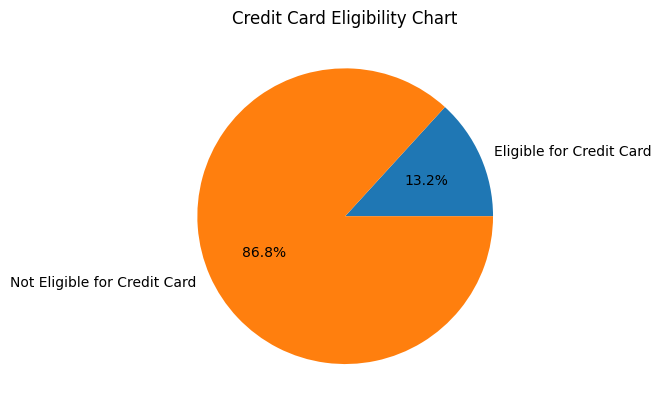

In [54]:
#Number of Credit Card Eligible Persons
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Credit Card Eligibility Chart')
plt.show()

In [55]:
eligible_percentage = (eligible_count / total_individuals) * 100
balance = abs(eligible_count - not_eligible_count) / total_individuals

print(f"Percentage of individuals eligible for a credit card: {eligible_percentage:.2f}%")
print(f"How balanced is the target variable? {balance:.2f}")

Percentage of individuals eligible for a credit card: 13.21%
How balanced is the target variable? 0.74


In [58]:
# Convert categorical features to numerical using LabelEncoder
le = LabelEncoder()
categorical_columns = ['Income_type', 'Education_type', 'Family_status', 'Housing_type',
       'Occupation_type']
for col in categorical_columns:
    dataframecredito[col] = le.fit_transform(dataframecredito[col])

In [59]:
X = dataframecredito.drop('Target', axis=1)
y = dataframecredito['Target']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (6796, 14)
Training Labels Shape: (6796,)
Testing Features Shape: (2913, 14)
Testing Labels Shape: (2913,)


In [62]:
# Build the Random Forest model
model1 = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
# Build the Decision Tree model
model2 = DecisionTreeClassifier()

# Fit the model on the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
# Build the Logisitc Regression model
model3 = LogisticRegression()

# Fit the model on the training data
model3.fit(X_train, y_train)

LogisticRegression()

In [65]:
# Build the Gradient Boosting model
model4 = GradientBoostingClassifier()

# Fit the model on the training data
model4.fit(X_train, y_train)

GradientBoostingClassifier()

In [66]:
# Build the SVM (Support Vector Machines)
model5 = SVC()

# Fit the model on the training data
model5.fit(X_train, y_train)

SVC()

In [67]:
# Make predictions on the test data and apply the model to pridict the values from the test attributes values
y_pred = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

#all predictions
model_predictions = [y_pred,y_pred2,y_pred3,y_pred4,y_pred5]

In [68]:
# Calculate the average of the predicted values
average_predictions = np.mean(model_predictions, axis=0)

In [69]:
#Average Class Classification Predictions
average_class_predictions = np.round(average_predictions).astype(int)

In [70]:
print("Accuracy for Credit Card Classification: ",accuracy_score(y_test,average_class_predictions)*100)

Accuracy for Credit Card Classification:  85.78784757981462


In [71]:
#Precision And Recall Scores
precision_scores = precision_score(y_test, y_pred, average=None)
recall_scores = recall_score(y_test, y_pred, average=None)

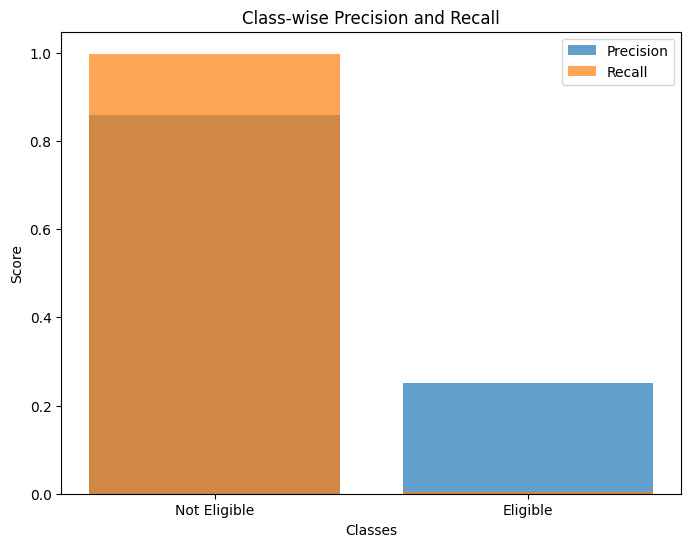

In [72]:
#Class-wise Precision and Recall
plt.figure(figsize=(8, 6))
plt.bar(range(2), precision_scores, label='Precision', alpha=0.7)
plt.bar(range(2), recall_scores, label='Recall', alpha=0.7)
plt.xticks(range(2), ['Not Eligible','Eligible'])
plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Class-wise Precision and Recall')
plt.legend()
plt.show()

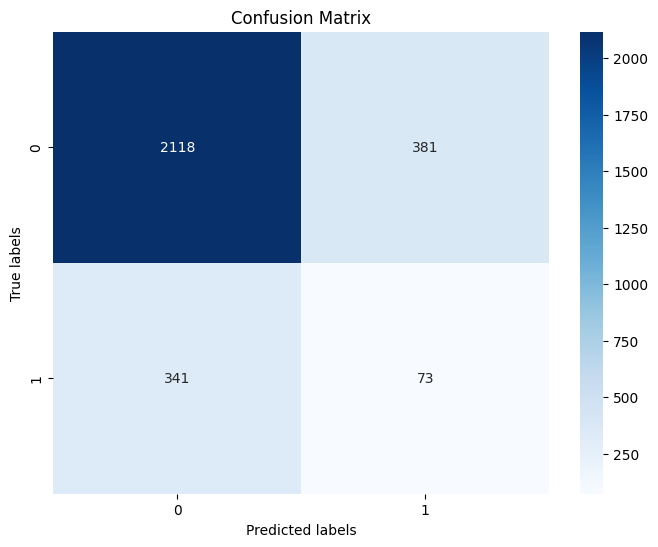

In [73]:
#confusion Matrix
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()